<a href="https://colab.research.google.com/github/freida20git/child-age-classification/blob/main/splits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install Pytorch & other libraries
%pip install "torch==2.5.0" "torchvision==0.20.0"
%pip install "setuptools<71.0.0" scikit-learn

# Install Hugging Face libraries
%pip install  --upgrade \
  "datasets==3.1.0" \
  "accelerate==1.2.1" \
  "hf-transfer==0.1.8"

# ModernBERT is not yet available in an official release, so we need to install it from github
%pip install "git+https://github.com/huggingface/transformers.git@6e0515e99c39444caae39472ee1b2fd76ece32f1" --upgrade


# DIVIDE INTO 3 SPLITS OF TRAIN, VALID AND TEST:


In [3]:
file_path = '/content/drive/MyDrive/age classification/data_llm.csv'
df = pd.read_csv(file_path)

In [4]:
# Remove all double quotes from child_text
df["child_text"] = df["child_text"].astype(str).str.replace('"', '', regex=False)

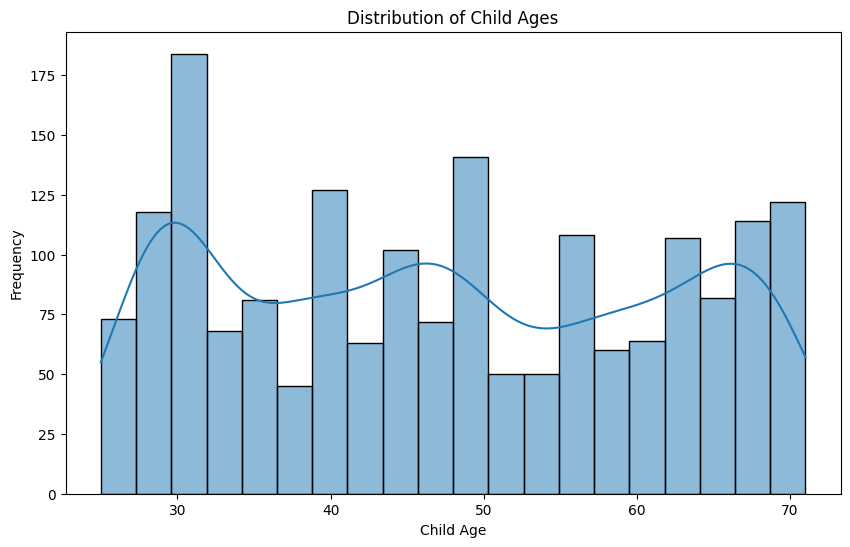

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram of child ages
plt.figure(figsize=(10, 6))
sns.histplot(df['child_age'].dropna(), kde=True, bins=20)
plt.title('Distribution of Child Ages')
plt.xlabel('Child Age')
plt.ylabel('Frequency')
plt.show()

Range 1: 24-36 (Toddler: 2-3 years)

Range 2: 37-48 (Preschool 3-4 years)

Range 3: 49-72 (Older child: 4-6 years)

In [6]:
bins = [24, 36, 60, 72]
labels = ["2_3", "3_5", "5_6"]

df["class_range"] = pd.cut(df["child_age"], bins=bins, labels=labels, right=True)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume df has a column 'child_id'
children = df["child_name"].unique()

# Fixed seeds (so you always get 3 different but reproducible splits)
seeds = [42, 123, 999]

# Split 1
train_c1, temp_c1 = train_test_split(children, test_size=0.4, random_state=seeds[0])
valid_c1, test_c1 = train_test_split(temp_c1, test_size=0.5, random_state=seeds[0])
Train1 = df[df["child_name"].isin(train_c1)]
Valid1 = df[df["child_name"].isin(valid_c1)]
Test1  = df[df["child_name"].isin(test_c1)]

# Split 2
train_c2, temp_c2 = train_test_split(children, test_size=0.4, random_state=seeds[1])
valid_c2, test_c2 = train_test_split(temp_c2, test_size=0.5, random_state=seeds[1])
Train2 = df[df["child_name"].isin(train_c2)]
Valid2 = df[df["child_name"].isin(valid_c2)]
Test2  = df[df["child_name"].isin(test_c2)]

# Split 3
train_c3, temp_c3 = train_test_split(children, test_size=0.4, random_state=seeds[2])
valid_c3, test_c3 = train_test_split(temp_c3, test_size=0.5, random_state=seeds[2])
Train3 = df[df["child_name"].isin(train_c3)]
Valid3 = df[df["child_name"].isin(valid_c3)]
Test3  = df[df["child_name"].isin(test_c3)]


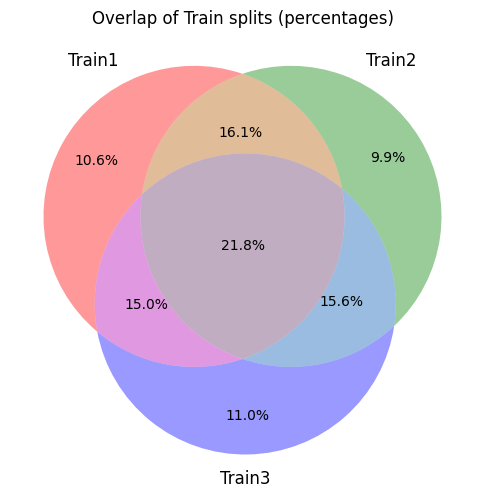

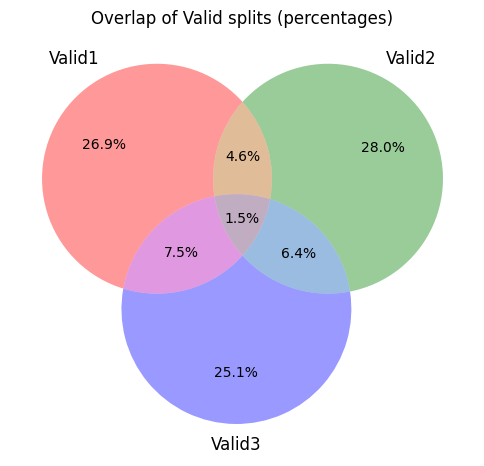

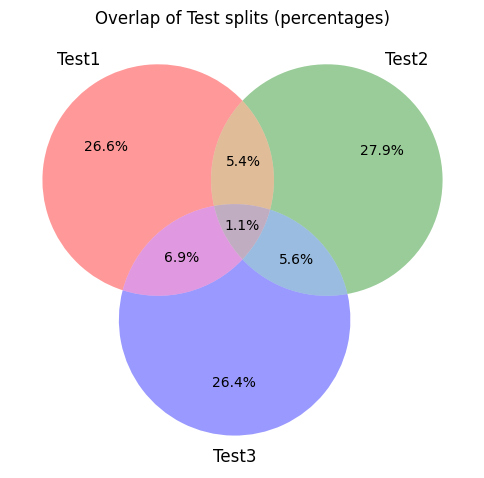

In [8]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

def plot_split_overlap(name):
    set1 = set(globals()[f"{name}1"]["child_name"])
    set2 = set(globals()[f"{name}2"]["child_name"])
    set3 = set(globals()[f"{name}3"]["child_name"])

    # Total unique children across all three splits
    total = len(set1.union(set2).union(set3))

    plt.figure(figsize=(6,6))
    venn = venn3([set1, set2, set3],
                 set_labels=(f"{name}1", f"{name}2", f"{name}3"))

    # Convert counts to percentages
    if venn.subset_labels:  # check if labels exist
        for label in venn.subset_labels:
            if label is not None:
                count = int(label.get_text())
                pct = 100.0 * count / total
                label.set_text(f"{pct:.1f}%")

    plt.title(f"Overlap of {name} splits (percentages)")
    plt.show()

# Plot for Train, Valid, Test
plot_split_overlap("Train")
plot_split_overlap("Valid")
plot_split_overlap("Test")


In [9]:
n_children = df["child_name"].nunique()
print("Number of unique children in dataset:", n_children)


Number of unique children in dataset: 1103


In [10]:
def keep_relevant(df):
    return df[["child_text", "class_range"]]

Train1, Valid1, Test1 = map(keep_relevant, [Train1, Valid1, Test1])
Train2, Valid2, Test2 = map(keep_relevant, [Train2, Valid2, Test2])
Train3, Valid3, Test3 = map(keep_relevant, [Train3, Valid3, Test3])


In [11]:
Train1.head()

,child_text,class_range
0,I got a Barbie and I like it. I have also done...,5_6
1,That one? No. I want cookie. I want cookie. M...,2_3
4,The boy who was going climbed over the wall fi...,5_6
8,"I want a read it. No! A moon, the sky, a circ...",3_5
11,"A doggie, um. An elephant, went crash, yeah. ...",2_3


In [13]:
# Save the splits to Google Drive
data_path = "/content/drive/MyDrive/age classification/233556_data/"

# Save Split 1
Train1.to_csv(f"{data_path}train_llm_split1.csv", index=False)
Valid1.to_csv(f"{data_path}validation_llm_split1.csv", index=False)
Test1.to_csv(f"{data_path}test_llm_split1.csv", index=False)

# Save Split 2
Train2.to_csv(f"{data_path}train_llm_split2.csv", index=False)
Valid2.to_csv(f"{data_path}validation_llm_split2.csv", index=False)
Test2.to_csv(f"{data_path}test_llm_split2.csv", index=False)

# Save Split 3
Train3.to_csv(f"{data_path}train_llm_split3.csv", index=False)
Valid3.to_csv(f"{data_path}validation_llm_split3.csv", index=False)
Test3.to_csv(f"{data_path}test_llm_split3.csv", index=False)

print("Splits saved successfully!")

Splits saved successfully!


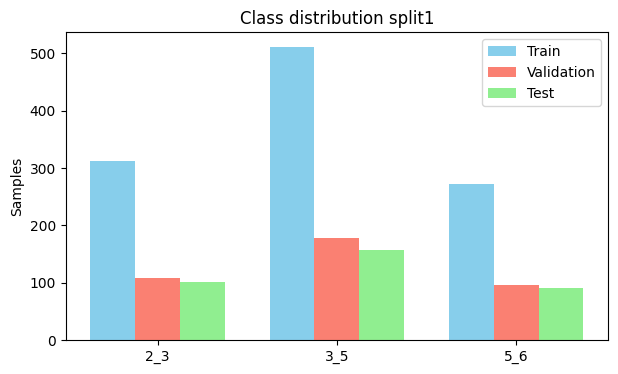

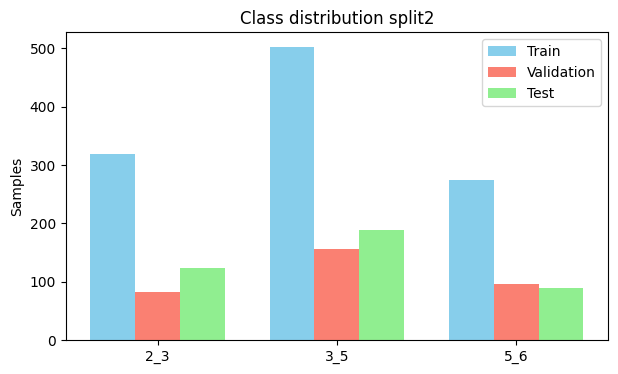

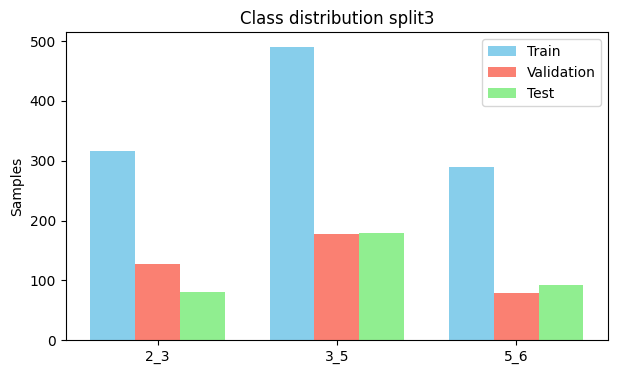

In [16]:
splits = ["split1", "split2", "split3"]
sets = ["train", "validation", "test"]
colors = ["skyblue", "salmon", "lightgreen"]
classes = ["2_3", "3_5", "5_6"]

for split in splits:
    counts = [pd.read_csv(f"{data_path}{s}_llm_{split}.csv")['class_range'].value_counts().reindex(classes, fill_value=0) for s in sets]
    x = np.arange(len(classes))
    width = 0.25
    plt.figure(figsize=(7,4))
    for i, c in enumerate(counts):
        plt.bar(x + i*width, c, width, label=sets[i].capitalize(), color=colors[i])
    plt.xticks(x + width, classes)
    plt.ylabel("Samples")
    plt.title(f"Class distribution {split}")
    plt.legend()
    plt.show()
